<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Análisis Exploratorio Visual
Introducción al EDA (Exploratory Data Analysis) Visual.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)




# 01 Import and Load Data

## 0102 Import 
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

In [1]:
import pandas as pd
import numpy as np

## 0102 Load Data
Recordemos, hemos visto 3 maneras de importar datos en Colab:

*   Importar una tabla desde Github
*   Cargar (y luego importar) una tabla de nuestro local
*   Importar una tabla de Google Drive

### 010201 Importa dataframe SP500
Lo importamos en un dataframe df_sp500 y modificamos la columna con la fecha a formato fecha.

In [52]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/sp500.csv'

# Importa csv
df_sp500 = pd.read_csv(url)

# Visualización primeras filas
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [53]:
# Cambiamos el formato de la columna 'Date'
df_sp500['Date'] = pd.to_datetime(
    df_sp500['Date'], format='%Y-%m-%d', errors='ignore')

### 010202 EJERCICIO Importa dataframe Covid-19
Os he dejado en mi Github: 
*   Los casos Covid-19 confirmados para ciertos países (esta es la ruta al archivo raw en GitHub https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Covid_Casos_Clean.csv). 
*   Las muertes por Covid-19 confirmadas para esos mismos países (esta es la ruta al archivo raw en github https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Covid_Muertes_Clean.csv). 

Para cada país, cada tabla contiene contiene:

*   X: Los casos/fallecimientos confirmados acumulados en el país X
*   X_REL: Los casos/fallecimientos confirmados acumulados en el país X por cada 100.000 habitantes. 
*   X_ult7: Los casos/fallecimientos confirmados en los últimos 7 días en el país X.
*   X_REL_ult7: Los casos/fallecimientos confirmados en los últimos 7 días en el país X por cada 100.000 habitantes.

Importa los datos del Covid como prefieras en dos dataframes: **df_casos_covid** y **df_muertes_covid** y modifica en ambos casos la **columna fecha para que esté en un formato de tipo fecha**.

In [54]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Covid_Casos_Clean.csv'

# Importa csv
df_casos_covid = pd.read_csv(url)

# Visualización primeras filas
df_casos_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,548,0,0,0,0,0,0,1,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,643,0,0,0,0,0,0,1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,920,2,0,0,0,0,0,2,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,1406,3,0,0,0,0,0,2,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2075,3,0,0,0,0,0,5,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Covid_Muertes_Clean.csv'

# Importa csv
df_muertes_covid = pd.read_csv(url)

# Visualización primeras filas
df_muertes_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,17,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,18,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,26,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,42,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,56,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Cambiamos el formato de la columna 'Date' en ambos dataframes
df_casos_covid['Date'] = pd.to_datetime(
    df_casos_covid['Date'], format='%Y-%m-%d', errors='ignore')

df_muertes_covid['Date'] = pd.to_datetime(
    df_muertes_covid['Date'], format='%Y-%m-%d', errors='ignore')

### 010203 Importa dataframe Fifa19
Importamos este dataset ya limpiado en un dataframe llamado **df_fifa19**. De nuevo está en mi GitHub https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv.


In [57]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv'

# Importa csv
df_fifa19 = pd.read_csv(url)

# Visualización primeras filas
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800,118500000.0,290000.0,228100000.0,175.26
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456,72000000.0,260000.0,138600000.0,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168,102000000.0,355000.0,196400000.0,180.34


# 02 Matplotlib
[Matplotlib](https://matplotlib.org/index.html) es la principal librería de python para visualizar datos. Es extensa, flexible y robusta. El punto de partida perfecto para visualizar datos.

Veamos cómo se utiliza.

In [11]:
# Se suele importar como plt
import matplotlib.pyplot as plt

## 0201 plt.plot()
plt.[plot()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) es la función básica de Pyplot.

In [12]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


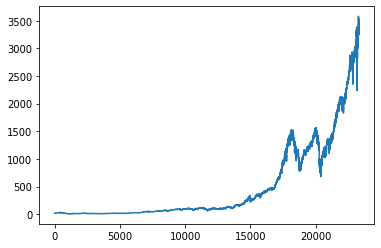

In [13]:
# Un solo argumento:
plt.plot(df_sp500['Close'])

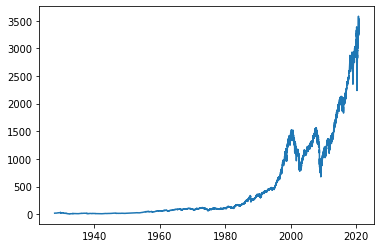

In [14]:
# Dos argumentos: x, y
plt.plot(df_sp500['Date'], df_sp500['Close'])

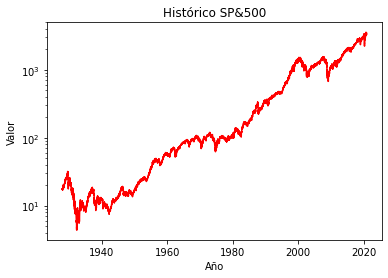

In [15]:
# Añadimos detalles
plt.plot(df_sp500['Date'], df_sp500['Close'], color='red')
plt.title('Histórico SP&500')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.yscale('log')
plt.show()

### 020101 EJEMPLO: Evolución Covid
Visualiza la evolución de casos acumulados de los países que contiene el dataframe.

Veamos varias visualizaciones útiles:

In [20]:
df_casos_covid.head(3)

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,548,0,0,0,0,0,0,1,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,643,0,0,0,0,0,0,1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,920,2,0,0,0,0,0,2,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


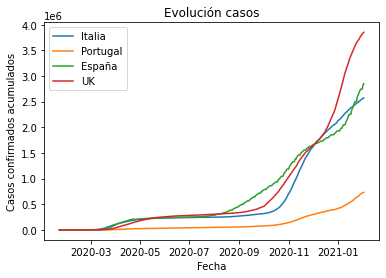

In [21]:
# Simplemente se añaden
plt.plot(df_casos_covid['Date'], df_casos_covid['Italy'], label='Italia')
plt.plot(df_casos_covid['Date'], df_casos_covid['Portugal'], label='Portugal')
plt.plot(df_casos_covid['Date'], df_casos_covid['Spain'], label='España')
plt.plot(df_casos_covid['Date'], df_casos_covid['UK'], label='UK')
plt.title('Evolución casos')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados acumulados')
plt.legend()
plt.show()

In [22]:
df_casos_covid.columns

Index(['Date', 'China', 'France', 'Germany', 'Italy', 'Portugal', 'Spain',
       'UK', 'US', 'China_REL', 'France_REL', 'Germany_REL', 'Italy_REL',
       'Portugal_REL', 'Spain_REL', 'UK_REL', 'US_REL', 'China_ult7',
       'France_ult7', 'Germany_ult7', 'Italy_ult7', 'Portugal_ult7',
       'Spain_ult7', 'UK_ult7', 'US_ult7', 'China_REL_ult7', 'France_REL_ult7',
       'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7',
       'Spain_REL_ult7', 'UK_REL_ult7', 'US_REL_ult7'],
      dtype='object')

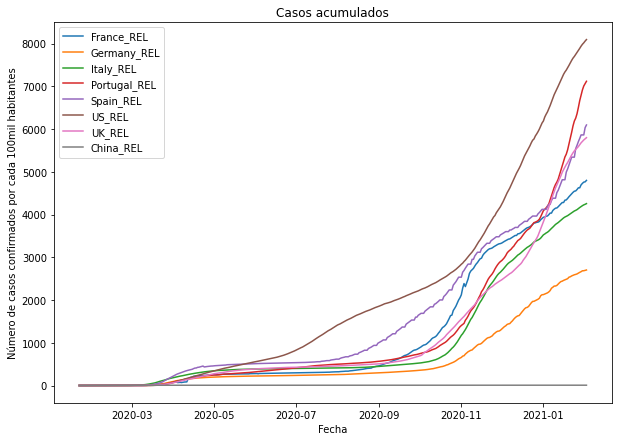

In [23]:
# En un loop
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais)
plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

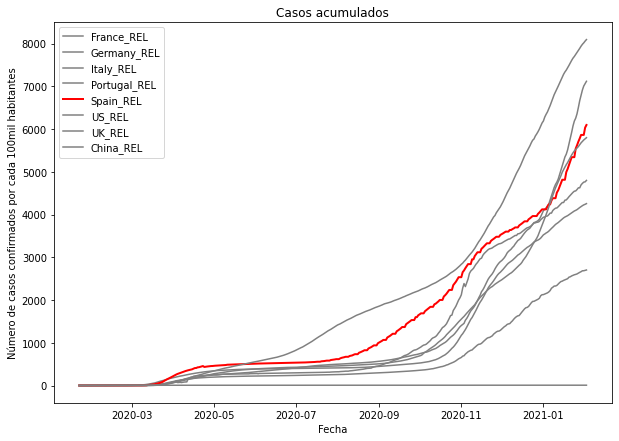

In [24]:
# En un loop definiendo los colores
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
  if pais == 'Spain_REL':
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, linewidth=2, color='red')
  else:
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

### 020102 EJERCICIO: Evolución Covid



*   Primero, muestra el número de casos acumulados en España por cada 100.000 habitantes: columna 'Spain_REL'.

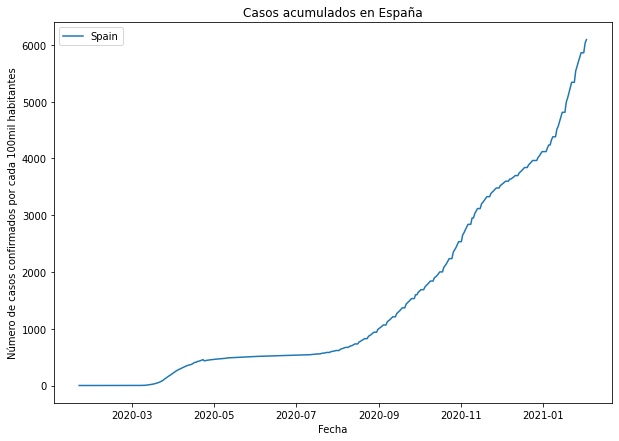

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(df_casos_covid['Date'], df_casos_covid['Spain_REL'], label='Spain')
plt.legend()
plt.title('Casos acumulados en España')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

*   Ahora, muestra el número de casos acumulados en los últimos 7 días en España, Italia, UK y Portugal por cada 100.000 habitantes: columnas 'Italy_REL_ult7', 'Portugal_REL_ult7', 'Spain_REL_ult7', 'UK_REL_ult7'.

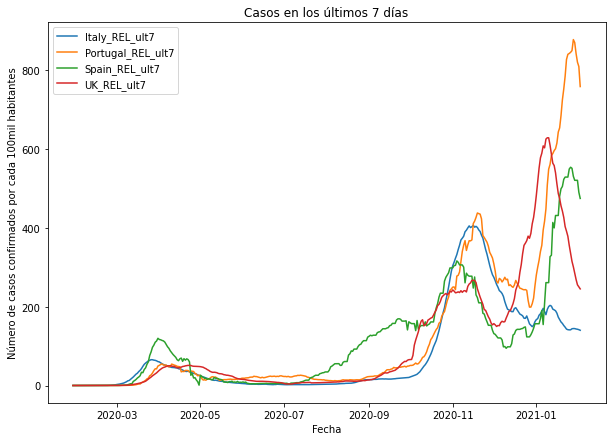

In [26]:
plt.figure(figsize=(10, 7))
for pais in [ 'Italy_REL_ult7', 'Portugal_REL_ult7', 'Spain_REL_ult7', 'UK_REL_ult7']:
  plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais)
  plt.legend()
plt.title('Casos en los últimos 7 días')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

*   Por último, muestra el número de casos acumulados en los últimos 7 días por cada 100.000 habitantes para todos los países disponibles. Muestra a China en azul, España en rojo y con anchura de 3, a US en negro, y el resto de países en gris.

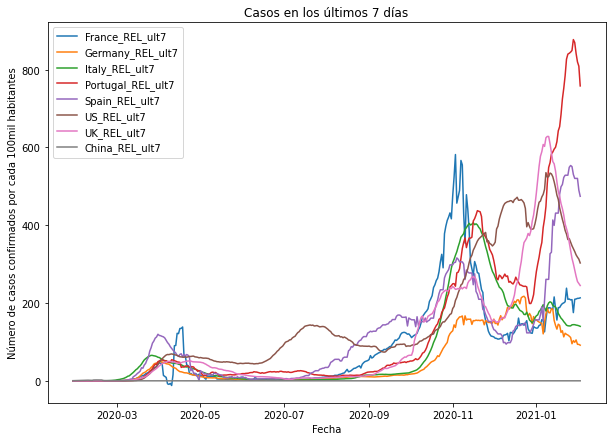

In [27]:
# Sin colores definidos
plt.figure(figsize=(10, 7))
for pais in ['France_REL_ult7', 'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7', 
             'Spain_REL_ult7', 'US_REL_ult7', 'UK_REL_ult7', 'China_REL_ult7']:
  plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais)
  plt.legend()
plt.title('Casos en los últimos 7 días')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

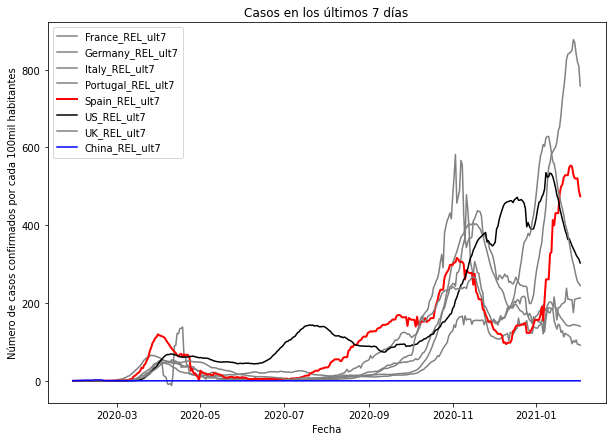

In [28]:
# En un loop
plt.figure(figsize=(10, 7))
for pais in ['France_REL_ult7', 'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7', 
             'Spain_REL_ult7', 'US_REL_ult7', 'UK_REL_ult7', 'China_REL_ult7']:
  if pais == 'Spain_REL_ult7':
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], linewidth=2, label=pais, color='red')
  elif pais == 'China_REL_ult7':
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, color='blue')
  elif pais == 'US_REL_ult7':
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, color='black')
  else:
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos en los últimos 7 días')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

## 0202 plt.bar()
plt.[bar()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) es la función de Pyplot para visualizar barras.

plt.[barh()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh) hace lo mismo pero con barras horizontales.



In [29]:
cols = ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']

ult_fila = df_casos_covid.index[-1]

serie_casos_rel = df_casos_covid.loc[ult_fila, cols]
serie_casos_rel

France_REL       4797.7
Germany_REL     2701.88
Italy_REL       4254.44
Portugal_REL    7116.62
Spain_REL       6094.19
US_REL             8092
UK_REL          5796.87
China_REL          7.19
Name: 377, dtype: object

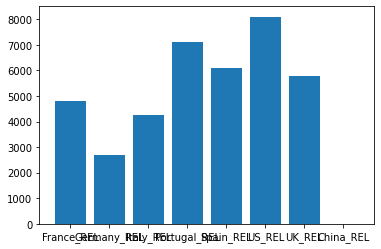

In [30]:
# Básico
plt.bar(x=serie_casos_rel.index, height=serie_casos_rel.values)
plt.show()

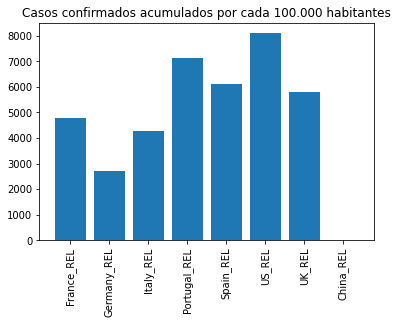

In [31]:
# Retoques
plt.bar(x=serie_casos_rel.index, height=serie_casos_rel.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.xticks(rotation=90)
plt.show()

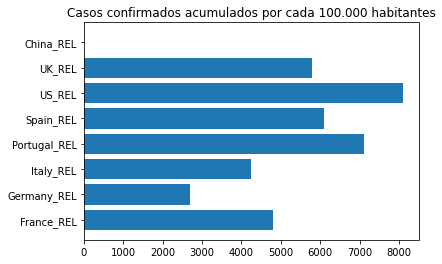

In [32]:
# En horizontal
plt.barh(y=serie_casos_rel.index, width=serie_casos_rel.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

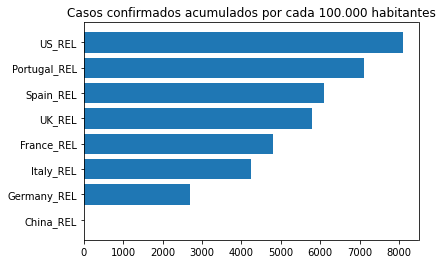

In [33]:
# Ordenado
serie_casos_rel = serie_casos_rel.sort_values()

plt.barh(y=serie_casos_rel.index, width=serie_casos_rel.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

### 020201 EJEMPLO: Jugadores diestros/zurdos
Los gráficos de barras suelen ser una muy buena idea para mostrar la distribución de variables categóricas.

Volviendo a nuestro dataset del fifa 19. Vamos a mostrar en un gráfico de barras cuántos jugadores diestros y zurdos hay.

La función value_counts() será muy útil.

In [34]:
# Recordemos lo que devuelve la función value_counts() aplicada sobre una serie
df_fifa19['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

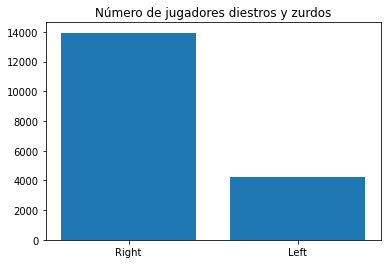

In [35]:
# Guardamos el resultado del value_counts(), que es un objeto serie
serie_pie_dominante = df_fifa19['Preferred Foot'].value_counts()

# Gráfico de barras
plt.bar(x=serie_pie_dominante.index, height=serie_pie_dominante.values)
plt.title('Número de jugadores diestros y zurdos')
plt.show()

#### Nota: Gráfico de tarta
Este es un buen ejemplo de un análisis en donde un gráfico de tarta no sería una mala opción. Las categorías zurdo/diestro son solo dos, son parte de un todo (jugadores totales) y es interesante saber cuál de las dos es mayoría.

En pyplot, el gráfico de tarta se realiza con plt.[pie](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html).

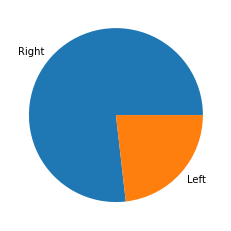

In [36]:
# Gráfico de tarta
plt.pie(serie_pie_dominante.values, labels=serie_pie_dominante.index)
plt.show()

### 020202 EJERCICIO: Covid acumulados
Muestra en un gráfico de barras horizontales los fallecidos por covid relativos (por cada 100.000 habitantes) de cada país acumulados desde el principio de la pandemia, ordenados de mayor a menor. 

In [37]:
df_muertes_covid.columns

Index(['Date', 'China', 'France', 'Germany', 'Italy', 'Portugal', 'Spain',
       'UK', 'US', 'China_REL', 'France_REL', 'Germany_REL', 'Italy_REL',
       'Portugal_REL', 'Spain_REL', 'UK_REL', 'US_REL', 'China_ult7',
       'France_ult7', 'Germany_ult7', 'Italy_ult7', 'Portugal_ult7',
       'Spain_ult7', 'UK_ult7', 'US_ult7', 'China_REL_ult7', 'France_REL_ult7',
       'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7',
       'Spain_REL_ult7', 'UK_REL_ult7', 'US_REL_ult7'],
      dtype='object')

In [38]:
cols = ['China_REL', 'France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'UK_REL', 'US_REL']

In [39]:
df_muertes_covid.loc[df_muertes_covid.index[-1],cols]

China_REL         0.35
France_REL      114.74
Germany_REL      71.16
Italy_REL       147.87
Portugal_REL    126.58
Spain_REL        127.8
UK_REL          162.52
US_REL          136.79
Name: 377, dtype: object

In [40]:
# Guardamos los 10 primeros resultados del value_counts()
serie_muertes_covid = df_muertes_covid.loc[df_muertes_covid.index[-1],cols].sort_values(ascending=True)
serie_muertes_covid

China_REL         0.35
Germany_REL      71.16
France_REL      114.74
Portugal_REL    126.58
Spain_REL        127.8
US_REL          136.79
Italy_REL       147.87
UK_REL          162.52
Name: 377, dtype: object

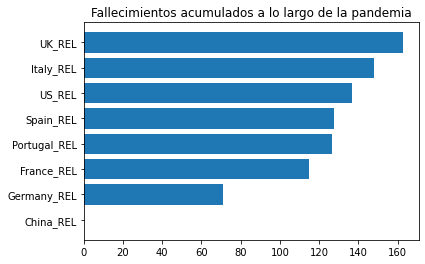

In [41]:
# Visualizamos el resultado
plt.barh(y=serie_muertes_covid.index, width=serie_muertes_covid.values)
plt.title('Fallecimientos acumulados a lo largo de la pandemia')
plt.show()

## 0203 plt.scatter()
Con plt.[scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) se realizan diagramas de dispersión (scatter plots).

In [42]:
df_fifa19.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96


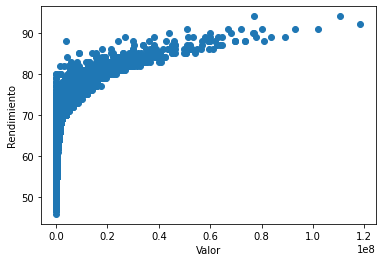

In [43]:
# Veamos la asociación entre valor y rendimiento
plt.scatter(df_fifa19['Value_€'],df_fifa19['Overall'])
plt.xlabel('Valor')
plt.ylabel('Rendimiento')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


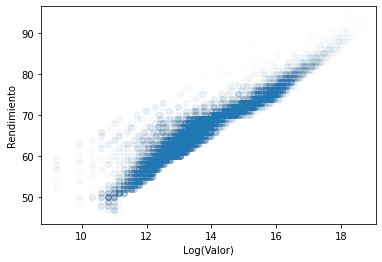

In [44]:
# alpha nos permite ver densidades
plt.scatter(np.log(df_fifa19['Value_€']), 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Log(Valor)')
plt.ylabel('Rendimiento')
plt.show()

El diagrama de dispersión de arriba muestra una clara asociación entre las variables valor y rendimiento. En este caso, parece claro que esto es porque el rendimiento influye directamente sobre el valor del jugador.

Pero hay otras razones por las que dos variables podrían estar correlacionadas sin que una cause a la otra. Hablaremos de esto en la próxima clase.

Volviendo a la asociación, esta es la pinta de dos variables que no tienen una gran asociación entre ellas:

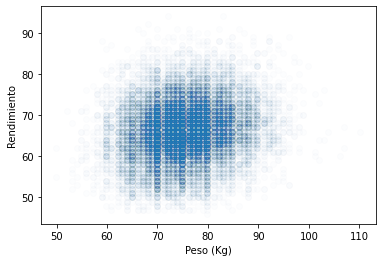

In [45]:
# el peso (entre atletas en su peso ideal) y el rendimiento no debería estar muy asociado
plt.scatter(df_fifa19['Weight_kg'], 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Peso (Kg)')
plt.ylabel('Rendimiento')
plt.show()

### 020301 EJERCICIO: Asociación edad/rendimiento
Muestra la asociación entre las variables edad (x) y rendimiento (y). Primero hazlo para todos los jugadores.

Luego, intenta un nuevo gráfico donde superpongas dos diagramas de dispersión: el primero, de nuevo, incluyendo todos los jugadores; el segundo, en naranja, se centrará en los jugadores españoles.

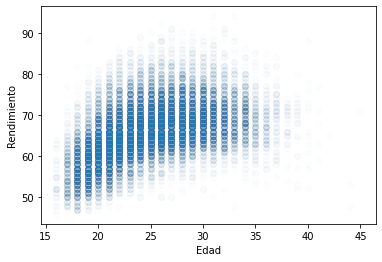

In [46]:
# Primero visualiza simplemente la asociación entre las dos variables
# diagrama de dispersión
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01)
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

In [47]:
# filtro jugadores españoles
filtro_españoles = df_fifa19['Nationality']=='Spain'

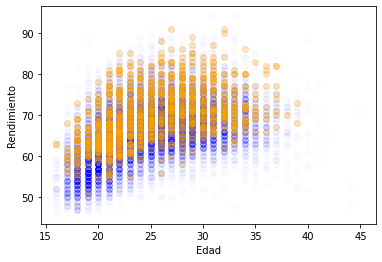

In [48]:
# diagrama de dispersión mundo vs España
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01, color='blue')
plt.scatter(df_fifa19.loc[filtro_españoles, 'Age'], 
            df_fifa19.loc[filtro_españoles, 'Overall'], 
            alpha=0.25, color='orange')
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

## 0204 plt.hist()
Los histogramas son una herramienta muy útil para visualizar la distribución de una variable continua.

En Pyplot, se utiliza plt.[hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html).

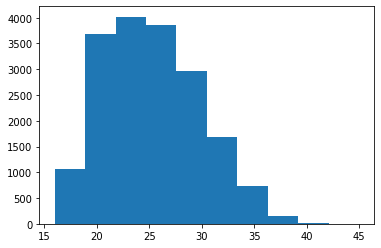

In [49]:
# distribución de la variable edad
plt.hist(df_fifa19['Age'])
plt.show()

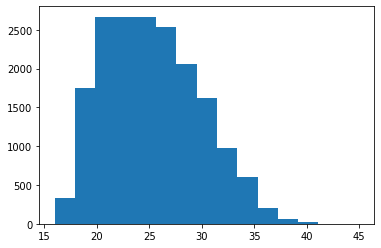

In [50]:
# 15 contenedores
plt.hist(df_fifa19['Age'], bins=15)
plt.show()

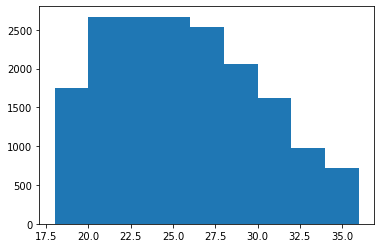

In [51]:
# contenedores personalizados
plt.hist(df_fifa19['Age'], bins=[18,20,22,24,26,28,30,32,34,36])
plt.show()

### 020301 EJERCICIO: Distribución de Overall
Muestra la distribución de la variable rendimiento (overall) usando 20 bins.

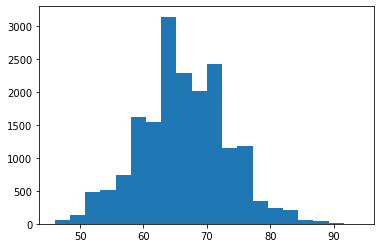

In [ ]:
plt.hist(df_fifa19['Overall'], bins=20)
plt.show()

## 0205 Uso de fig y ax
Hasta ahora hemos definido una gráfica añadiendo información directamente sobre plt y luego mostrándolo con plt.show().

Pero esto nos daría problemas si quisiéramos visualizar dos gráficos distintos sobre una misma imagen. Cómo podríamos hacerlo?

Utilizando los objetos [fig y ax](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca). 

### 020501 plt.subplots()
plt.[subplots()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html) genera una figura vacía y devuelve un tuple ([no sabes lo que es un tuple?](https://www.programiz.com/python-programming/tuple)):

(figura, ejes).

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b37d2c438>)

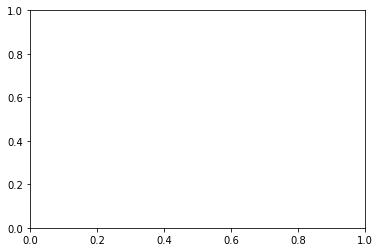

In [ ]:
plt.subplots()

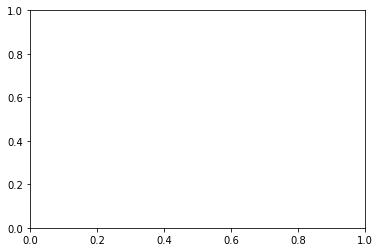

In [ ]:
fig, ax = plt.subplots()

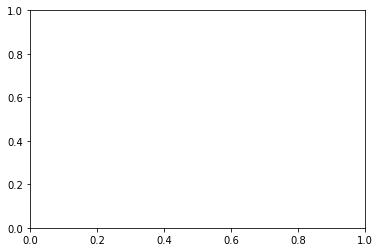

In [ ]:
fig

In [ ]:
ax

Hemos creado dos variables: fig y ax que representan la imagen y el gráfico respectivamente. 

**Fig** es, conceptualmente, el objeto de la imagen. Podemos hacer la imagen más o menos grande o configurar la estética.
**Ax** es una representación datos de manera visual: son los datos en forma de gráfico de líneas, de barras, etc. Es, en definitiva, un gráfico. 

Una misma figura puede tener varios ax. En cuanto a la nomenclatura, podríamos llamarle de otra forma pero fig y ax es la convención (como importar pandas como pd, o seaborn como sns) así que mejor cumpliremos con los estándares típicos.

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b40bca390>,
       dtype=object))

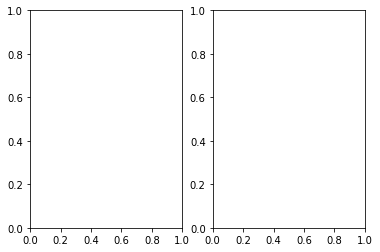

In [ ]:
# También podemos generar imágenes (fig) con más de un gráfico (ax)
plt.subplots(nrows=1, ncols=2)

(<Figure size 432x288 with 10 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b377be2e8>,
       dtype=object))

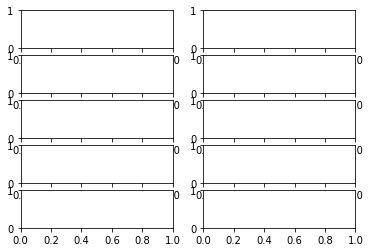

In [ ]:
# O con muchos más. Más adelante veremos cómo utilizarlos
plt.subplots(nrows=5, ncols=2)

### 020502 ax.plot()
Una vez hemos definido el número de **ax**s que va a tener nuestra **fig** podemos definir cada uno de los gráficos (ax).

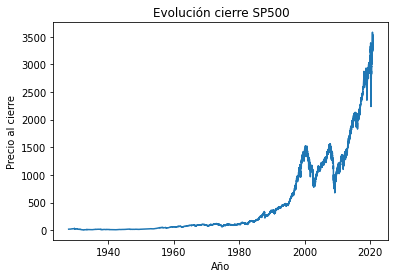

In [ ]:
# Con plt.plot()
plt.plot(df_sp500['Date'], df_sp500['Close'])
plt.title('Evolución cierre SP500')
plt.xlabel('Año')
plt.ylabel('Precio al cierre')
plt.show()

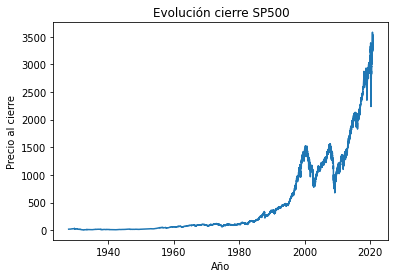

In [ ]:
# Conf fig, ax
fig, ax = plt.subplots()
ax.plot(df_sp500['Date'], df_sp500['Close'])
ax.set(title='Evolución cierre SP500', 
       xlabel='Año', 
       ylabel='Precio al cierre')
plt.show()

#### EJEMPLO: Fallecimientos Covid
Representamos la evolución de fallecimientos relativa acumulada y relativa en los últimos 7 días en una misma imagen.

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b37c4e358>,
       dtype=object))

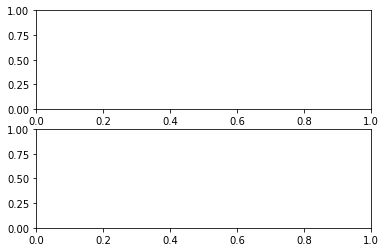

In [ ]:
# Vamos a generar dos gráficas en una misma imagen (una encima de la otra)
plt.subplots(nrows=2, ncols=1)

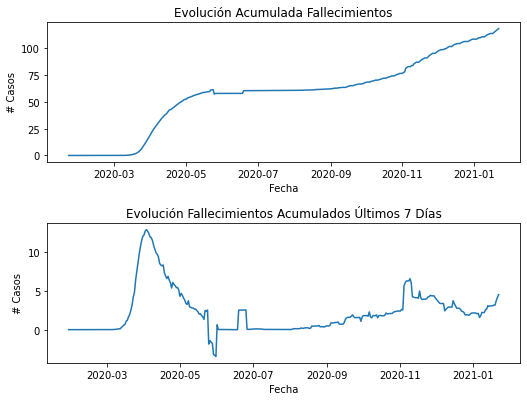

In [ ]:
# Generamos las variables (ahora tenemos dos ax)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad=2)
fig.set_size_inches(8,6)
ax1.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL'])
ax1.set(title='Evolución Acumulada Fallecimientos', 
        xlabel='Fecha', 
        ylabel='# Casos')
ax2.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL_ult7'])
ax2.set(title='Evolución Fallecimientos Acumulados Últimos 7 Días', 
        xlabel='Fecha', 
        ylabel='# Casos')
plt.show()

#### EJERCICIO Covid Comparación Países
Vamos a realizar una imagen con dos gráficos (2 columnas).

En ambos mostraremos la comparación de fallecidos en los últimos 7 días. En uno con una gráfico de barras horizontales, en otro con una mala elección: un gráfico de tarta.

Aprovecharemos para comprobar por qué es una mala elección:

In [ ]:
cols = ['China_REL_ult7', 'France_REL_ult7',
       'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7',
       'Spain_REL_ult7', 'UK_REL_ult7', 'US_REL_ult7']

In [ ]:
serie_muertes_covid_ult7 = df_muertes_covid.loc[df_muertes_covid.index[-1],cols].sort_values(ascending=True)
serie_muertes_covid_ult7

China_REL_ult7           0
France_REL_ult7       4.02
Spain_REL_ult7        4.54
Italy_REL_ult7        5.54
US_REL_ult7           6.61
Germany_REL_ult7      7.25
UK_REL_ult7          13.07
Portugal_REL_ult7    13.39
Name: 366, dtype: object

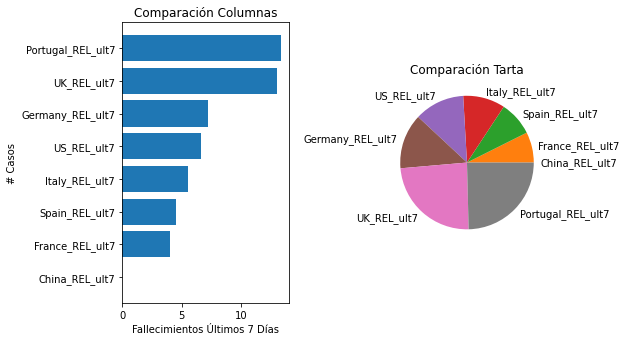

In [ ]:
# Generamos las variables (ahora tenemos dos ax)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=4)
fig.set_size_inches(8,6)
ax1.barh(y=serie_muertes_covid_ult7.index, width=serie_muertes_covid_ult7.values)
ax1.set(title='Comparación Columnas', 
        xlabel='Fallecimientos Últimos 7 Días', 
        ylabel='# Casos')
ax2.pie(serie_muertes_covid_ult7.values, labels=serie_muertes_covid_ult7.index)
ax2.set(title='Comparación Tarta')
plt.show()

### 020503 ax.twinx()
ax.[twinx](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.twinx.html) y ax.[twiny](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.twiny.html) crean un nuevo ax que comparte el eje x o y (respectivamente) con el original.

Esto nos permitirá realizar gráficos de distinto tipo sobre un mismo eje.


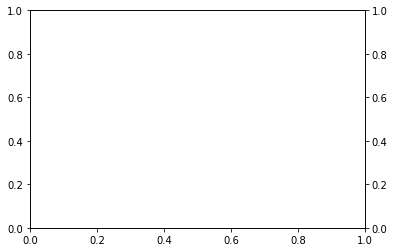

In [ ]:
# Conf fig, ax
fig, ax_a = plt.subplots()
ax_b = ax_a.twinx()
display(ax_b)
display(ax_a)

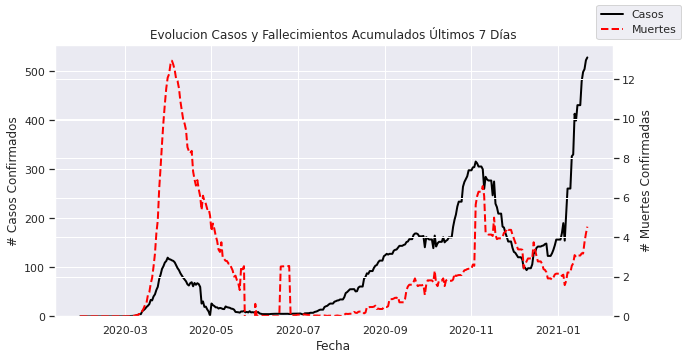

In [ ]:
# Conf fig, ax
fig, ax_a = plt.subplots()
ax_b = ax_a.twinx()

# Configuramos la figura
fig.set_size_inches(10,5)

# Generamos los ax
ax_a.plot(df_casos_covid['Date'], df_casos_covid['Spain_REL_ult7'],
          color = 'black', linewidth = 2, label='Casos')
ax_a.set(title='Evolucion Casos y Fallecimientos Acumulados Últimos 7 Días', 
         xlabel='Fecha', 
         ylabel='# Casos Confirmados')
ax_a.set_ylim(bottom=0)
ax_b.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL_ult7'], 
          color='red', linewidth = 2, linestyle='dashed', label='Muertes')
ax_b.set(ylabel='# Muertes Confirmadas')
ax_b.set_ylim(bottom=0)

# Añadimos la layenda
fig.legend()
plt.show()

# 03 Seaborn
[Seaborn](https://seaborn.pydata.org/) es una librería de Python de visualización basada en matplolib.

La utilizaremos para mejorar la estética de nuestros gráficos y para realizar ciertas mejoras sobre los gráficos básicos de matplolib.




In [ ]:
# Se suele importar como sns
import seaborn as sns

## 0301 sns.set()
La función sns.[set()](https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set) modifica la estética de los gráficos de matplotlib.pyplot a la estándar de seaborn. 

Os recomiendo ejecutarla antes de generar gráficos con matplotlib.pyplot. De hecho, veamos los gráficos anteriormente generados ahora realizados tras haber ejecutado sns.set().

In [ ]:
# Este comando hará tus gráficos más profesionales
sns.set()

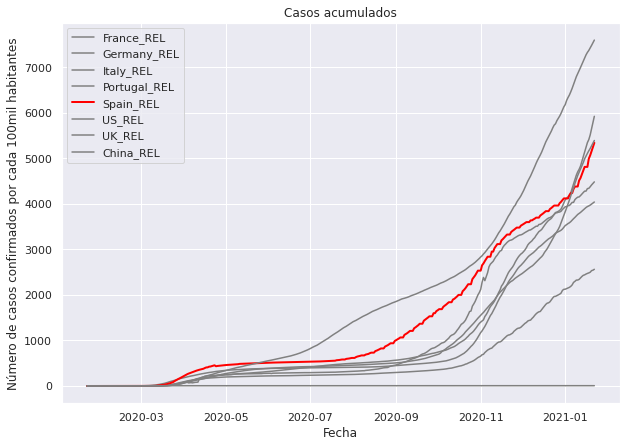

In [ ]:
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
  if pais == 'Spain_REL':
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, linewidth=2, color='red')
  else:
    plt.plot(df_casos_covid['Date'], df_casos_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

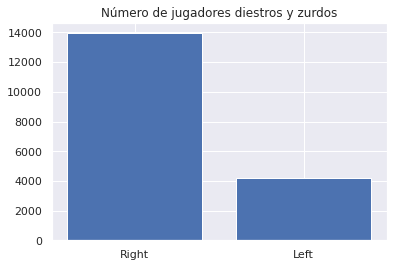

In [ ]:
# Gráfico de barras
plt.bar(x=serie_pie_dominante.index, height=serie_pie_dominante.values)
plt.title('Número de jugadores diestros y zurdos')
plt.show()

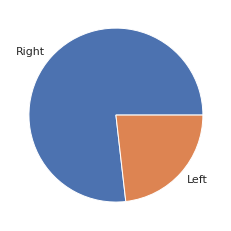

In [ ]:
# Gráfico de tarta
plt.pie(serie_pie_dominante.values, labels=serie_pie_dominante.index)
plt.show()

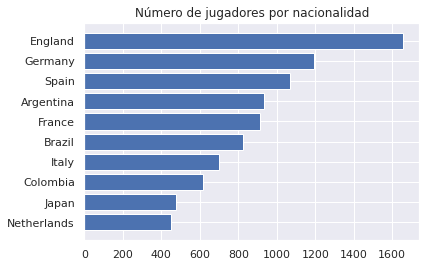

In [ ]:
# Visualizamos el resultado
plt.barh(y=serie_nacionalidad.index[::-1], width=serie_nacionalidad.values[::-1])
plt.title('Número de jugadores por nacionalidad')
plt.show()

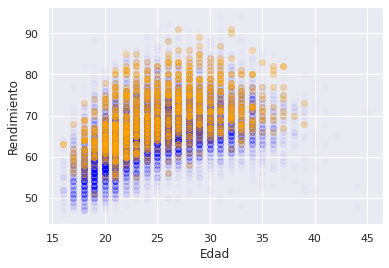

In [ ]:
# diagrama de dispersión mundo vs España
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01, color='blue')
plt.scatter(df_fifa19.loc[filtro_españoles, 'Age'], 
            df_fifa19.loc[filtro_españoles, 'Overall'], 
            alpha=0.25, color='orange')
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

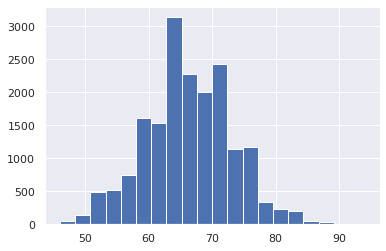

In [ ]:
plt.hist(df_fifa19['Overall'], bins=20)
plt.show()

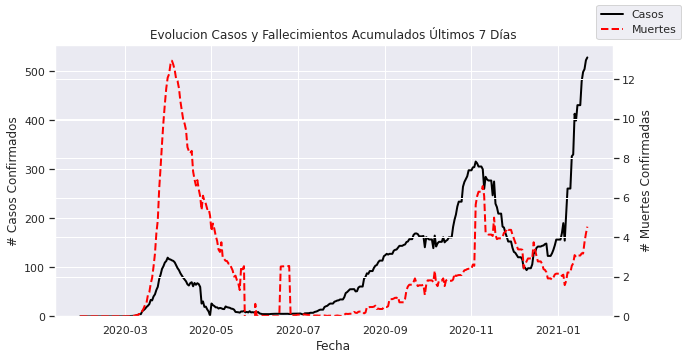

In [ ]:
# Conf fig, ax
fig, ax_a = plt.subplots()
ax_b = ax_a.twinx()

# Configuramos la figura
fig.set_size_inches(10,5)

# Generamos los ax
ax_a.plot(df_casos_covid['Date'], df_casos_covid['Spain_REL_ult7'],
          color = 'black', linewidth = 2, label='Casos')
ax_a.set(title='Evolucion Casos y Fallecimientos Acumulados Últimos 7 Días', 
         xlabel='Fecha', 
         ylabel='# Casos Confirmados')
ax_a.set_ylim(bottom=0)
ax_b.plot(df_muertes_covid['Date'], df_muertes_covid['Spain_REL_ult7'], 
          color='red', linewidth = 2, linestyle='dashed', label='Muertes')
ax_b.set(ylabel='# Muertes Confirmadas')
ax_b.set_ylim(bottom=0)

# Añadimos la layenda
fig.legend()
plt.show()

Se pueden definir muchos temas distintos utilizando [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme).

## 0302 Otras ventajas de seaborn
Además de sns.[set()](https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set), seaborn puede ser útil en cuanto a que facilita realizar ciertas gráficas, más complejas y especializadas.

Podéis ver algunos ejemplos [aquí](https://seaborn.pydata.org/examples/index.html) y los comandos a emplear [aquí](https://seaborn.pydata.org/api.html).

Veremos algún ejemplo en los ejercicios.



# 04 Pandas-Profiling
Pandas-Profiling es una librería que realiza informes EDA interactivos y de manera automática sobre un dataframe.

Veamos cómo utilizarla.

## 0401 Instalar e importar
No es una librería tan habitual, por lo que no está incorporada en Colab. Primero tenemos que instalarla, y luego, sí, la importamos como hemos venido haciendo con otras:

In [ ]:
# Instalamos pandas-profiling
! pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.10.0)


In [ ]:
# Importamos solo la función ProfileReport (la verdaderamente importante)
from pandas_profiling import ProfileReport

## 0402 Se define el report
Definimos el informe que queremos genrar, simplemente pasándole a la función el dataframe y el título del informe.

In [ ]:
profile_sp500 = ProfileReport(df_sp500, 
                               title='SP500', 
                               html={'style':{'full_width':False}})

In [ ]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€',  
        'Club', 'Preferred Foot'
        ]
len(df_fifa19)      

18159

In [ ]:
profile_fifa19 = ProfileReport(df_fifa19.loc[:5000, cols], 
                               title='Informe Fifa 19', 
                               html={'style':{'full_width':False}})

## 0403 Generamos y guardamos
Generamos y guardamos los informes.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
profile_sp500.to_file(output_file="/content/drive/My Drive/Data/SP500 Informe EDA.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_fifa19.to_file(output_file="/content/drive/My Drive/Data/Fifa19 Informe EDA.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]